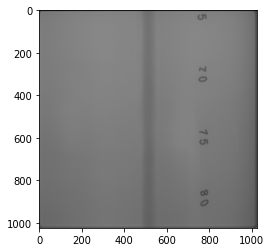

In [31]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# 载入彩色图
path = 'data/0005.jpg'
img = cv.imread(path)
img2 = img[:,:,::-1]
plt.imshow(img2)

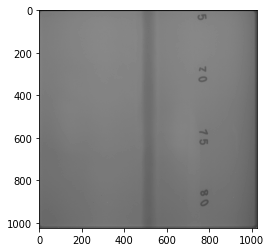

In [32]:
# 载入灰度图
img = cv.imread(path, cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

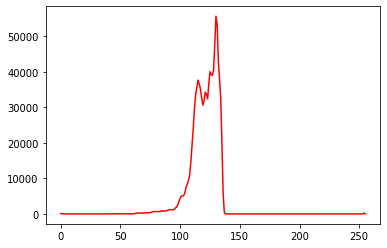

In [33]:
# 绘制灰度像素统计直方图，全范围从0到255
low, high = 0, 255
hist = cv.calcHist([img], [0], None, [high-low+1], [low, high])
plt.plot(np.arange(low, high+1, step=1), hist, color='r')

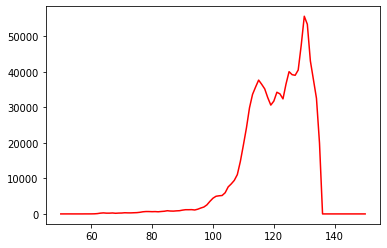

In [39]:
# 上图显然在0处有波峰，因为0是整个图片中占比最大的部分，也即黑色部分
# 250以上会有小段波峰，这个应该是由左右上角的两个字符标识造成的，也就是白色部分
# 统计范围调整为50到180
low, high = 50, 150
hist = cv.calcHist([img], [0], None, [high-low+1], [low, high])
plt.plot(np.arange(low, high+1, step=1), hist, color='r')

In [3]:
# 上图可见大部分像素应该落在140左右，这是左右两边颜色比较浅的区域，落在110左右的像素应该是较深的区域

# 较亮的区域
low = 120
img = cv.imread(path, cv.IMREAD_GRAYSCALE)
img[low<img] = 255
plt.imshow(img, cmap='gray')


NameError: name 'cv' is not defined

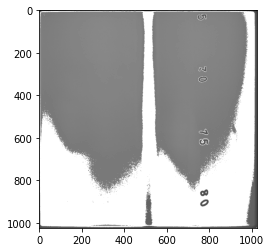

In [41]:
# 左边较暗的地方和中间焊缝
low, high = 100, 120
img = cv.imread(path, cv.IMREAD_GRAYSCALE)
img[np.logical_and(low<img, img<high)] = 255
plt.imshow(img, cmap='gray')

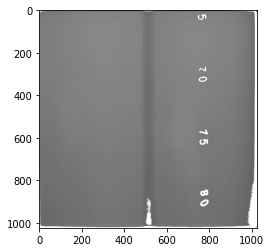

In [37]:
# 文字部分
low, high = 60, 100
img = cv.imread(path, cv.IMREAD_GRAYSCALE)
img[np.logical_and(low<img, img<high)] = 255
plt.imshow(img, cmap='gray')

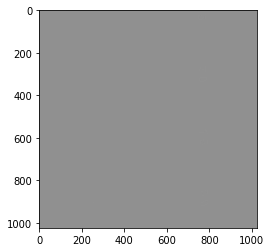

In [122]:
img = cv.imread(path, cv.IMREAD_GRAYSCALE)
gradx = cv.Laplacian(img, cv.CV_32F)
plt.imshow(gradx, cmap='gray')
# gradx = cv.convertScaleAbs(gradx)
# grady = cv.convertScaleAbs(dy)
# plt.figure()
# plt.imshow(gradx)
# plt.figure()
# plt.imshow(grady)
# plt.figure()
# gradxy = cv.addWeighted(gradx, 0.5, grady, 0.5, 0)
# gradxy = gradx

# gradimg = (gradxy - np.min(gradxy)) / (np.max(gradxy) - np.min(gradxy)) * 255
# low, high = 170, 180
# hist = cv.calcHist([gradimg], [0], None, [high-low+1], [low, high])
# plt.plot(np.arange(low, high+1, step=1), hist, color='r')
# gradimg[gradimg>176] = 255
# gradimg[np.logical_and(low<gradimg, gradimg<high)] = 0
# plt.imshow(gradimg, cmap='gray')


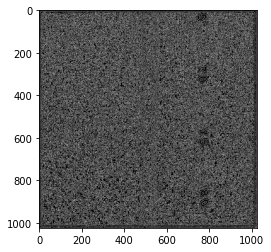

In [141]:
img = cv.imread(path, cv.IMREAD_GRAYSCALE)
img = cv.Canny(img, 1, 1)
plt.imshow(img, cmap='gray')